In [1]:

!apt updateapt update
!pip install mdbtools-dev
!apt-get install mdbtools
!pip install pandas pyodbc
!pip install tempfile2
import warnings
warnings.filterwarnings('ignore')

E: Invalid operation updateapt
ERROR: Could not find a version that satisfies the requirement mdbtools-dev (from versions: none)
ERROR: No matching distribution found for mdbtools-dev
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
mdbtools is already the newest version (1.0.0+dfsg-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import sys
sys.path.append('/content/drive/MyDrive/Dev/py2/')
import numpy as np

import pandas as pd
from google.colab import files
import os
import subprocess
from io import StringIO  # StringIOを正しくインポート
import model.utility.k_analysis_util as k_a_util
from IPython.display import display

from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import trange

In [11]:

# 使用例
table_name = 'StatisticsVariables'  # テーブル名を指定

file_list = [f'kjdb_prediction_cache_{year}.accdb' for year in range(2000, 2025)]
years = range(2000, 2026)

k_a_util.prepare_pd_on_notebook()
print(len(file_list))

dict_statistics={}
for i in trange(len(years)):
  y = years[i]
  filepath = f'/content/drive/MyDrive/Dev/Kjvan/kjdb_prediction_cache_{y}.accdb'
  df_summary = k_a_util.read_table(filepath, table_name)
  #df_summary = df_summary[df_summary['sv_program_id'].str[-2:].astype(int).between(1, 10)]
  #df_summary = df_summary[df_summary['sv_program_id'].str[-2:].apply(lambda x: x.isdigit() and 1 <= int(x) <= 10)]
  #df_summary = df_summary[df_summary['sv_program_id'].str[-2:].apply(lambda x: x.isdigit() and 1 <= int(x) <= 10)]

  columns_to_drop = ['sv_program_id','sv_horse_id', 'upd']
  df = df_summary.drop(columns=columns_to_drop)
  dict_statistics[y] = df.astype(float)

25


100%|██████████| 26/26 [01:29<00:00,  3.45s/it]


sv_feet_pb1


<Figure size 640x480 with 0 Axes>

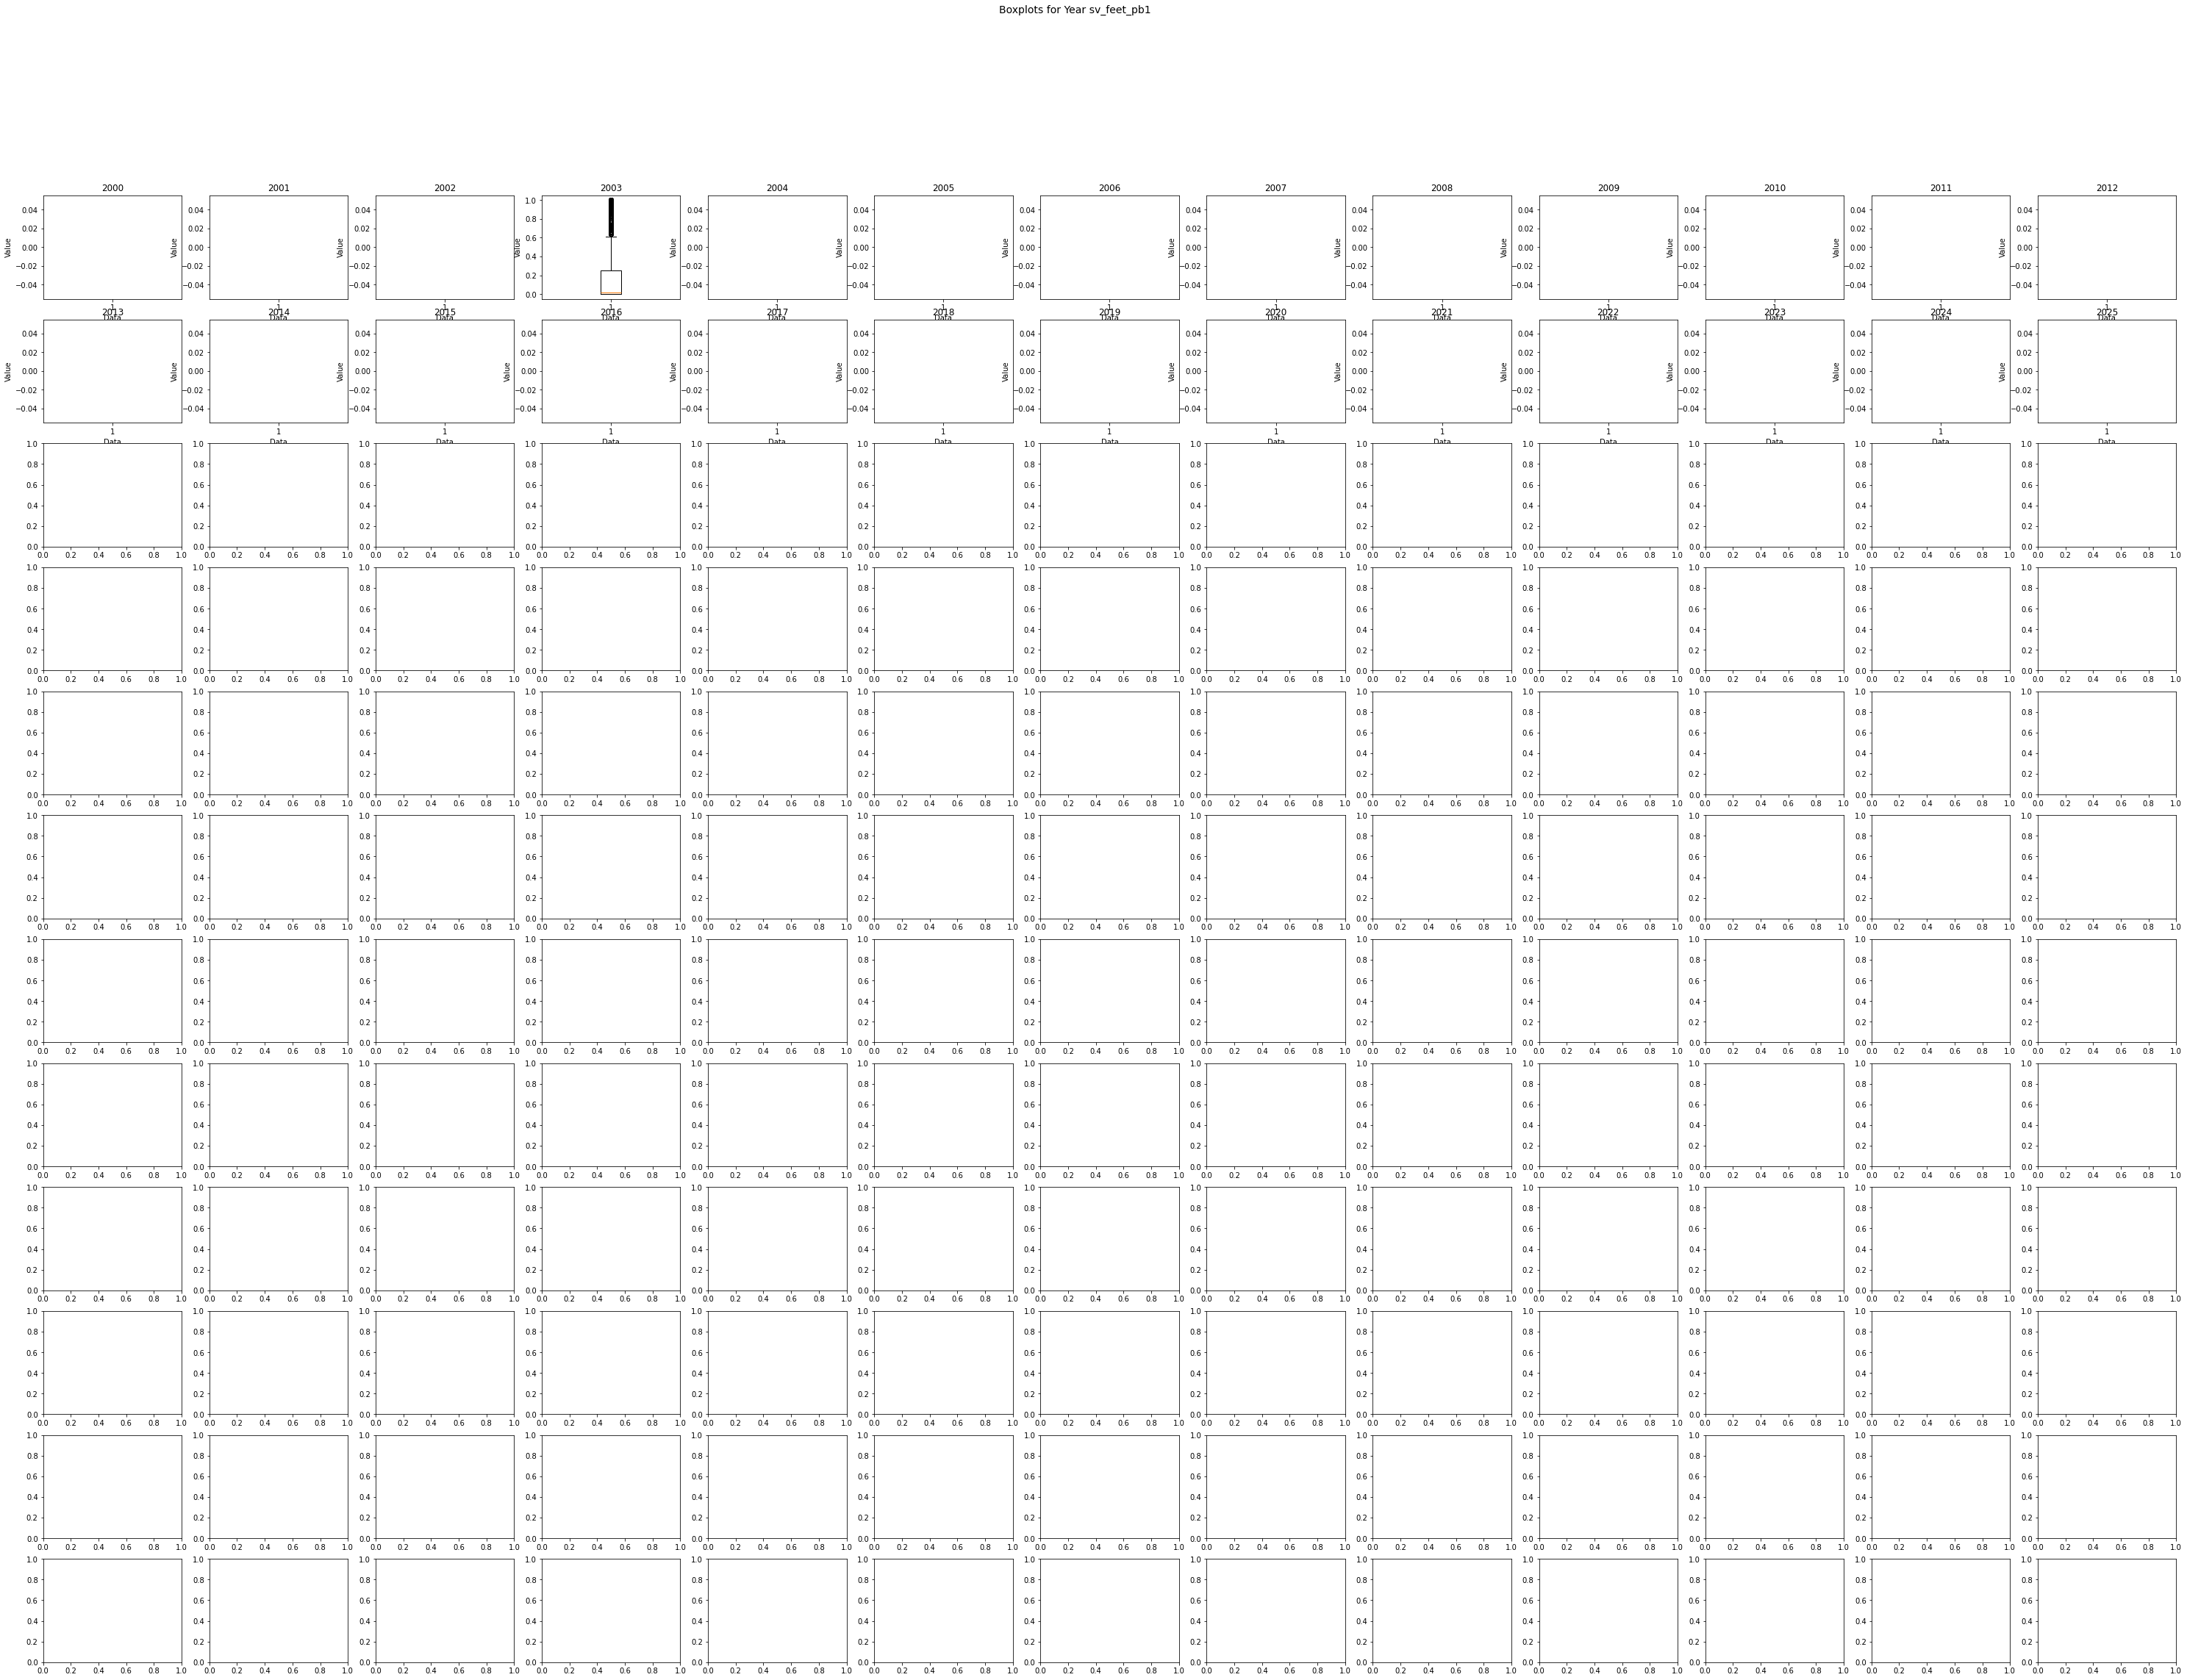

sv_feet_pb2


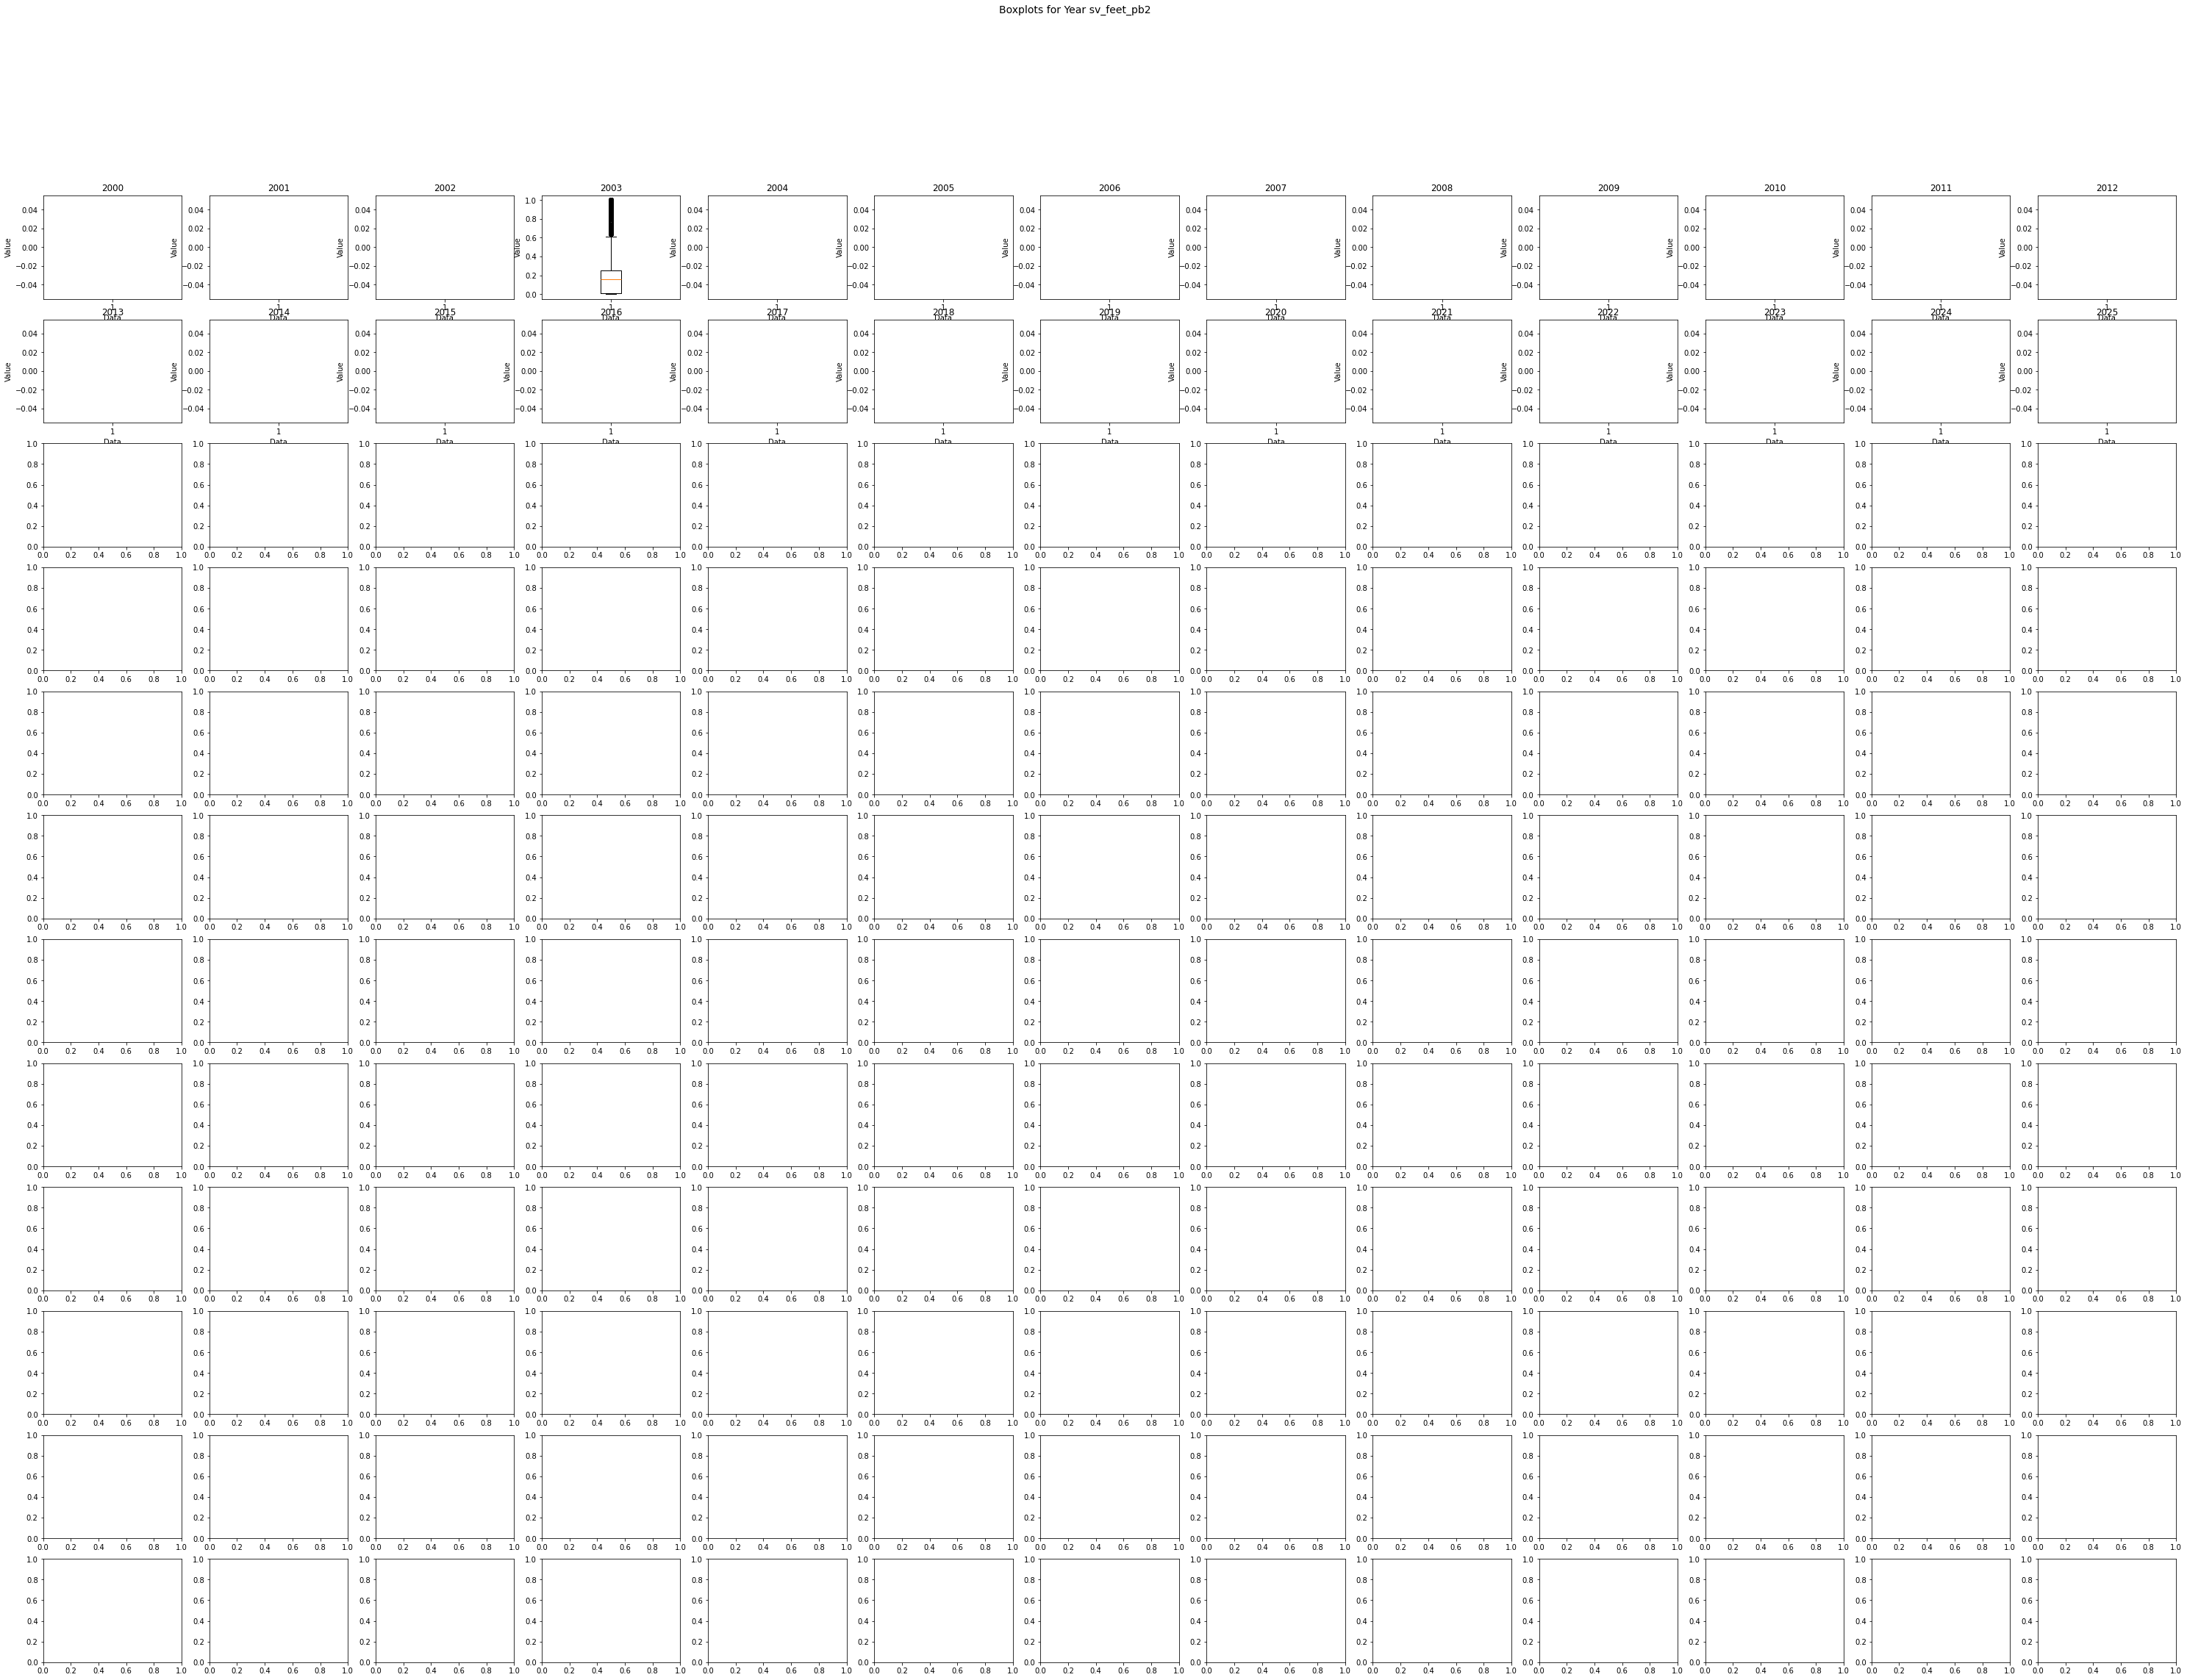

sv_feet_pb3


KeyboardInterrupt: 

In [18]:
dict_results = k_a_util.pivot_statistics_by_column2(dict_statistics)
# ヒストグラムの作成 (グラフの行数、列数、解像度を適宜変更)
k_a_util.plot_boxplots(dict_results, rows=4, cols=8, dpi=72)


In [12]:
# prompt: ２つの同じ構成のデータフレームのある列を箱ひげ図を表示して比較するようにする関数を作っていください。引数はDataFrame２つと列名です

import matplotlib.pyplot as plt
import seaborn as sns

def compare_columns_with_boxplot(df1, df2, column_name):
    """
    2つのデータフレームの同じ列を箱ひげ図で比較表示する関数。

    Args:
        df1: 比較対象のデータフレーム1。
        df2: 比較対象のデータフレーム2。
        column_name: 比較対象の列名。
    """

    # データの結合
    df1['DataFrame'] = 'DataFrame 1'  # データフレームの識別用列を追加
    df2['DataFrame'] = 'DataFrame 2'
    combined_df = pd.concat([df1[[column_name, 'DataFrame']], df2[[column_name, 'DataFrame']]])

    # 箱ひげ図の作成
    plt.figure(figsize=(10, 6))  # 図のサイズを調整
    sns.boxplot(x='DataFrame', y=column_name, data=combined_df)
    plt.title(f'{column_name} Comparison')
    plt.xlabel('DataFrame')
    plt.ylabel(column_name)
    plt.show()

In [13]:
# prompt: ２つの同じ構成のデータフレームのある列を箱ひげ図を表示して比較するようにする関数を作っていください。引数はDataFrame２つとDataFrame名1と２、それと列名です。
# 列名は複数指定して、それ事に比較する箱ひげ図を書いてください

def compare_dataframes_with_boxplot(df1, df2, df1_name, df2_name, column_names):
    """
    2つのデータフレームの指定した列を箱ひげ図で比較表示する関数。

    Args:
        df1: 比較対象のデータフレーム1。
        df2: 比較対象のデータフレーム2。
        df1_name: データフレーム1の名前 (文字列)。
        df2_name: データフレーム2の名前 (文字列)。
        column_names: 比較対象の列名のリスト。
    """

    for column_name in column_names:
        # データの結合
        df1_temp = df1[[column_name]].copy()
        df1_temp['DataFrame'] = df1_name
        df2_temp = df2[[column_name]].copy()
        df2_temp['DataFrame'] = df2_name
        combined_df = pd.concat([df1_temp, df2_temp])

        # 箱ひげ図の作成
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='DataFrame', y=column_name, data=combined_df)
        plt.title(f'{column_name} Comparison between {df1_name} and {df2_name}')
        plt.xlabel('DataFrame')
        plt.ylabel(column_name)
        plt.show()

In [14]:

column_names=['sv_arg_dev','sv_arg_dev']
compare_dataframes_with_boxplot(dict_statistics[2024], dict_statistics[2000], '2024', '2000',column_names)

NameError: name 'compare_two_dfs_boxplot' is not defined